# Feed Forward Neural Network

In [19]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural Network, Activation Function
# loss and optimizer
# Training loop (batch training)
# Model evaluation
# GPU support

In [20]:
import torch as tr
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [21]:
# device configuration
device = tr.device('cuda' if tr.cuda.is_available() else 'cpu')

In [22]:
# hyper parameters
input_size = 784 #28X28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [23]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root = './data_mnist',
    train = True, transform= transforms.ToTensor(), download= True)

test_dataset = torchvision.datasets.MNIST(root = './data_mnist',
train= False, transform= transforms.ToTensor())


In [24]:
train_loader = tr.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = tr.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [25]:
examples  = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


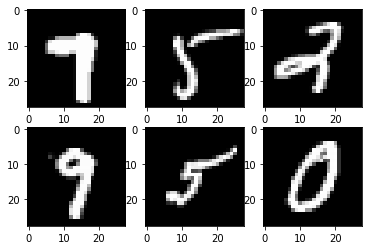

In [26]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out

model = NeuralNetwork(input_size, hidden_size,num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = tr.optim.Adam(model.parameters(), lr = learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100,1,28,28 --> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0 :
            print(f'epoch {epoch+1} / {num_epochs}, loss  = {loss.item(): .4f}')


# test 
with tr.no_grad():
    no_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        #value, index
        _,predictions = tr.max(outputs, 1)
        n_samples += labels.shape[0]
        no_correct += (predictions == labels).sum().item()
    
    accuracy = 100 * no_correct/n_samples
    print(f'Accuracy = {accuracy}')

epoch 1 / 2, loss  =  0.4459
epoch 1 / 2, loss  =  0.6061
epoch 1 / 2, loss  =  0.3204
epoch 1 / 2, loss  =  0.1861
epoch 1 / 2, loss  =  0.2046
epoch 1 / 2, loss  =  0.2348
epoch 2 / 2, loss  =  0.0816
epoch 2 / 2, loss  =  0.2488
epoch 2 / 2, loss  =  0.1407
epoch 2 / 2, loss  =  0.2670
epoch 2 / 2, loss  =  0.1185
epoch 2 / 2, loss  =  0.1662
Accuracy = 95.25
